In [3]:
%matplotlib inline


# Reading epochs from a raw FIF file


This script shows how to read the epochs from a raw file given
a list of events. For illustration, we compute the evoked responses
for both MEG and EEG data by averaging all the epochs.




In [4]:
# Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#          Matti Hamalainen <msh@nmr.mgh.harvard.edu>
#
# License: BSD (3-clause)

import mne
from mne import io
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()

Automatically created module for IPython interactive environment


Set parameters



In [5]:
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
event_id, tmin, tmax = 1, -0.2, 0.5

# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

# Set up pick list: EEG + MEG - bad channels (modify to your needs)
raw.info['bads'] += ['MEG 2443', 'EEG 053']  # bads + 2 more
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, eog=True,
                       exclude='bads')

# Read epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=(None, 0), preload=True,
                    reject=dict(grad=4000e-13, mag=4e-12, eog=150e-6))

evoked = epochs.average()  # average epochs to get the evoked response

Opening raw data file /home/arasdar/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
72 matching events found
Created an SSP operator (subspace dimension = 3)
4 projection items activated
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch b

Show result



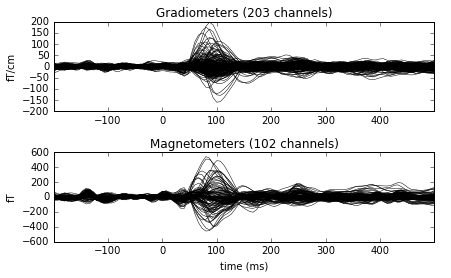

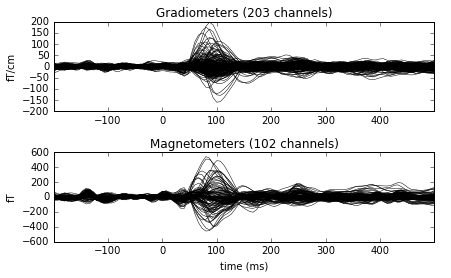

In [6]:
evoked.plot()